### Author: Ran Meng

This jupyter notebook contains my work for certification of "Experimental Design in Python" instructed by Luke Hayden, from [DataCamp](https://www.datacamp.com/courses/experimental-design-in-python)

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import plotnine as p9
import statsmodels as sm
import statsmodels.stats.power as pwr

import warnings
warnings.filterwarnings('ignore')

**One- Sample T test**:

We want to compare the mean heights in cm of the Sample_A group with a given value. We want to see whether the mean weight of the people in this sample is significantly different from the chosen cut-off point of 65 kg

In [2]:
Sample_A = [54.2, 66.4, 66.9, 64.4, 71.1]

t_result=stats.ttest_1samp(Sample_A, 65)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("mean value of Sample A differs from given value")
else:
    print("\nNo significant difference found")

Ttest_1sampResult(statistic=-0.14187430361917347, pvalue=0.8940381290746852)

No significant difference found


**One-sample t-test**

In this exercise, you will perform a one-sample t-test using the ttest_1sample() function. Using eudata, a dataset of country-level statistics, you'll be looking at the sex ratios found in the population of European countries. You'll use a one sample t-test to determine if the mean sex ratio found among European countries differs significantly from 50-50. First, you'll make some plots, then you'll perform your test. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9.

In [3]:
#import global UN dataset
UN = pd.read_csv('UN.csv')

print(UN.shape)

UN.head()

(229, 50)


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,38.2,135.0,0.8,145.4/3.7,5900.0,55.0,84.3/81.8,89.8/82.2,0.05,NaN
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,...,NaN,92.0,87.9,NaN,NaN,NaN,100.0/100.0,62.5/62.5,NaN,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,96.9,13.0,34,0.5/6.4,1.0,119.0,100.0/100.0,100.0/100.0,NaN,NaN


In [4]:
UN.rename(columns={"Sex ratio (m per 100 f, 2017)": "Sex ratio"}, inplace = True)

# Extract countries that are either in Europe or Asia

asia = UN[UN['Region'].str.contains("Asia")]
print ('Number of Asian countries', asia.shape[0])

europe = UN[UN['Region'].str.contains("Europe")]
print ('Number of European countries', europe.shape[0])


Number of Asian countries 50
Number of European countries 48


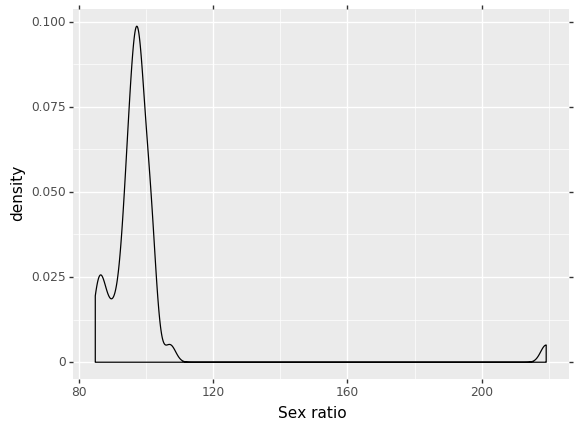

<ggplot: (81679954380)>


In [5]:
# Create the density plot
print(p9.ggplot(europe)+ p9.aes(x='Sex ratio')+ p9.geom_density(alpha=0.5))

In [6]:
# Perform the one-sample t-test
t_result= stats.ttest_1samp(europe['Sex ratio'], 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Sex ratios are significantly biased")
else:
    print("\nNo significant bias found")

Ttest_1sampResult(statistic=-0.5356948819785791, pvalue=0.5946955313654608)

No significant bias found


**Two-sample t-test**

Now we'll compare two sets of samples. Again, we'll be looking at the Sex_ratio (number of males per 100 females) found in different countries, but this time we're going to compare the Sex_ratio of European countries with Asian countries. Does the mean sex ratio differ between the two continents? 

In [7]:
europe.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",Sex ratio,GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,96.9,13.0,34,0.5/6.4,1.0,119.0,100.0/100.0,100.0/100.0,NaN,NaN
12,Austria,WesternEurope,83871,8736,106.0,96.2,376967.0,1,44117.7,1.3,...,83.9,118.0,46.9,58.7/6.9,505.0,158.0,100.0/100.0,100.0/100.0,NaN,NaN
18,Belarus,EasternEurope,207600,9468,46.7,87.0,54609.0,-3.9,5750.8,7.5,...,62.2,25.0,42.5,63.5/6.7,155.0,122.0,99.9/99.1,94.1/95.2,0.2,NaN
19,Belgium,WesternEurope,30528,11429,377.5,97.3,455107.0,1.5,40277.8,0.7,...,85.1,37.0,22.6,93.4/8.3,520.0,196.0,100.0/100.0,99.5/99.4,NaN,NaN


In [8]:
asia.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",Sex ratio,GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,3,3489.1,19,...,58.2,114.0,11.7,5.5/1.8,48.0,46.0,100.0/100.0,96.2/78.2,3.17,NaN
13,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049.0,0.7,5438.7,6.7,...,77,97.0,13.5,37.5/3.9,2459.0,61.0,94.7/77.8,91.6/86.6,0.14,NaN
15,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126.0,2.9,22600.2,0.3,...,93.5,36.0,0.8,31.3/23.0,961.0,413.0,100.0/100.0,99.2/99.2,NaN,NaN
16,Bangladesh,SouthernAsia,147570,164670,1265.0,101.7,194466.0,6.6,1207.9,15.5,...,14.4,151.0,11,73.2/0.5,1438.0,11.0,86.5/87.0,57.7/62.1,1.24,NaN


In [9]:
# Perform two- Sample t test

t_result= stats.ttest_ind(europe['Sex ratio'], asia['Sex ratio'])
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("Europe and Asia have different mean sex ratios")
    
else: print("No significant difference found")

Ttest_indResult(statistic=-2.1196552594510925, pvalue=0.03661463597787138)
Europe and Asia have different mean sex ratios


**Chi-square test**

Chi- square test examines proportions of discrete categories. 

In this exercise, you will be working with the Olympics dataset. Here, we're going to look at the sex ratio of the American Olympic squads. Is a bias present? That is to say, does the ratio of male to female athletes significantly depart from 50-50?

In [10]:
#import global olympics dataset
olympics = pd.read_csv('olympics.csv')

print(olympics.shape)

olympics.head()

(61819, 14)


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,28,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
2,30,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
3,36,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
4,37,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN


In [11]:
athletics = olympics[olympics['Sport'] == 'Athletics']
print('Athletics: ', athletics.shape)

swimming = olympics[olympics['Sport'] == 'Swimming'] 
print('Swimming: ', swimming.shape)

Athletics:  (38624, 14)
Swimming:  (23195, 14)


In [12]:
# Extract sex ratio
sexratio = athletics['Sex'].value_counts()

sexratio

M    26958
F    11666
Name: Sex, dtype: int64

In [13]:
# Perform Chi-square test
chi= stats.chisquare(sexratio)
print(chi)

# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between sexes is statistically significant")
else:
    print("No significant difference between sexes found")

Power_divergenceResult(statistic=6054.403065451533, pvalue=0.0)
Difference between sexes is statistically significant


**Fisher's exact test**

Now, you will work with the Olympics dataset to look at the relative success of the American swimming and athletics teams. Whether each athlete received a medal is coded as True or False in the MedalTF column of athletes. Do a larger proportion of swimming or athletics participants come home with medals? A Fisher exact test is a useful way to compare proportions of samples falling into discrete categories. To test this, you will need to perform a Fisher exact test on MedalTF in relation to Sport. pandas and plotnine have already been imported as pd and p9.

In [14]:
americans = olympics[olympics['Team'] == 'United States']
americans.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
51,274,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Amsterdam,Athletics,"Athletics Men's 5,000 metres",NaN
81,467,"Abdihakim ""Abdi"" Abdirahman",M,23.0,178.0,61.0,United States,USA,2000 Summer,2000,Sydney,Athletics,"Athletics Men's 10,000 metres",NaN
82,468,"Abdihakim ""Abdi"" Abdirahman",M,27.0,178.0,61.0,United States,USA,2004 Summer,2004,Athina,Athletics,"Athletics Men's 10,000 metres",NaN
83,469,"Abdihakim ""Abdi"" Abdirahman",M,31.0,178.0,61.0,United States,USA,2008 Summer,2008,Beijing,Athletics,"Athletics Men's 10,000 metres",NaN
84,470,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,London,Athletics,Athletics Men's Marathon,NaN


In [15]:
americans['MedalTF'] = americans['Medal'].notnull() #If null in Medal, then assigns False(meaning no medal)

In [16]:
# Create a table of cross-tabulations
table = pd.crosstab(americans['MedalTF'], americans['Sport'])
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions of medal winners differ significantly")
else:
    print("No significant difference in proportions of medal winners found")

Sport    Athletics  Swimming
MedalTF                     
False         2131       556
True          1071      1066
(3.8148405645231716, 2.4220956742371155e-101)
Proportions of medal winners differ significantly


**Pearson correlation**

In this exercise, you will be using the Olympic athletes dataset and focusing on just one event, the men's 100 meter running race. The dataset is provided in your workspace as athletes. You're going to be looking at how the weights of competitors have changed over time. A Pearson correlation test allows us to determine whether a linear relationship exists between two variables. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9, respectively. First, you'll make some plots, then you'll see how the sprinters' weights have changed over time.

In [17]:
men_100m = olympics[(olympics['Event'] == 'Athletics Men\'s 100 metres') &  (olympics['Team'] == 'United States')]

print(men_100m.shape)
men_100m.head()

(118, 14)


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
3334,12693,Ryan Bailey,M,23.0,193.0,82.0,United States,USA,2012 Summer,2012,London,Athletics,Athletics Men's 100 metres,NaN
3411,12941,Walter Thane Baker,M,25.0,183.0,72.0,United States,USA,1956 Summer,1956,Melbourne,Athletics,Athletics Men's 100 metres,Silver
4645,18447,Frank Vern Belote,M,28.0,172.0,69.0,United States,USA,1912 Summer,1912,Stockholm,Athletics,Athletics Men's 100 metres,NaN
5605,22929,Clyde Amel Blair,M,22.0,NaN,NaN,United States,USA,1904 Summer,1904,St. Louis,Athletics,Athletics Men's 100 metres,NaN
5782,23692,Dixon H. Boardman,M,20.0,NaN,NaN,United States,USA,1900 Summer,1900,Paris,Athletics,Athletics Men's 100 metres,NaN


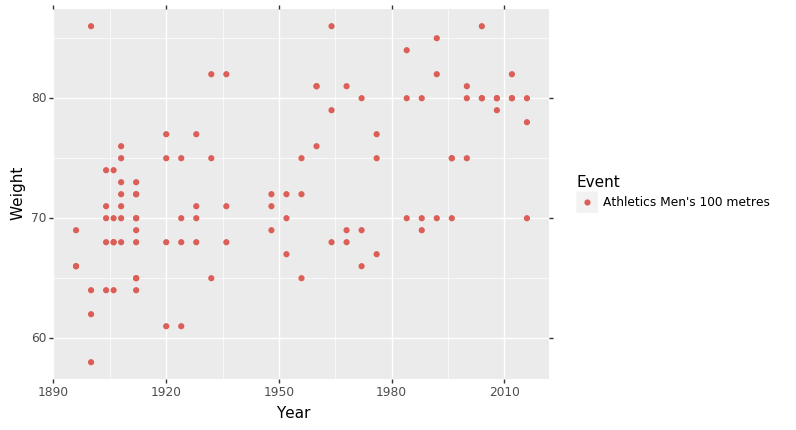

<ggplot: (81680167779)>


In [18]:
# Create the scatter plot
print(p9.ggplot(men_100m)+ p9.aes(x='Year', y='Weight', color='Event')+  p9.geom_point())

In [19]:
# Run the correlation test
pearson = stats.pearsonr(men_100m['Year'], men_100m['Weight'])
print(pearson)

# Test if p-value is bigger or smaller than alpha
alpha = 0.05
if pearson[1] < alpha:
    print("Weights and year are significantly correlated")
else:
    print("No significant correlation found")

(nan, 1.0)
No significant correlation found


**Exploring confounding variables**

In this exercise, you're going to do some exploratory data analysis (EDA) to better understand confounding variables. Once again, we'll be looking at trends in weights of Olympic athletes from the athletes DataFrame. We are interested in possible differences between the weights of athletes from different countries, which may be more difficult to determine than it seems.

In [20]:
# Extract athletes from either Kenya or Ethopia

kenya_ethopia = olympics[(olympics['Team'] == 'Kenya') | (olympics['Team'] == 'Ethiopia')]

print(kenya_ethopia.shape)

kenya_ethopia.head()

(772, 14)


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
144,655,Addis Abebe,M,21.0,160.0,50.0,Ethiopia,ETH,1992 Summer,1992,Barcelona,Athletics,"Athletics Men's 5,000 metres",NaN
145,656,Addis Abebe,M,21.0,160.0,50.0,Ethiopia,ETH,1992 Summer,1992,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze
152,721,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Sydney,Athletics,Athletics Men's Marathon,Gold
153,722,Tesfaye Abera Dibaba,M,24.0,192.0,68.0,Ethiopia,ETH,2016 Summer,2016,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
250,1049,Ayele Abshero Biza,M,21.0,168.0,62.0,Ethiopia,ETH,2012 Summer,2012,London,Athletics,Athletics Men's Marathon,NaN


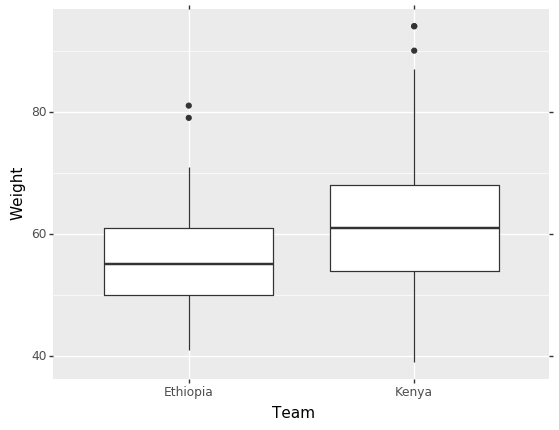

<ggplot: (-9223371955174609671)> 

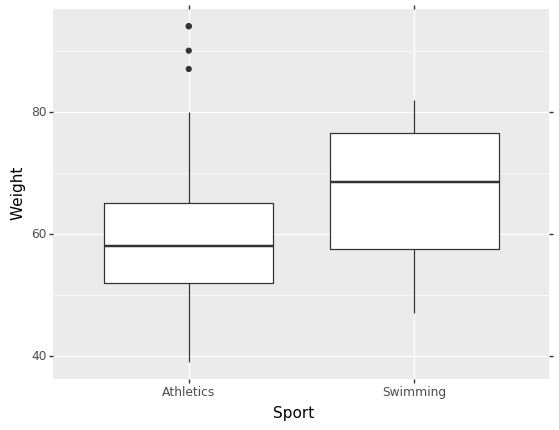

<ggplot: (-9223371955174609818)>
Sport     Athletics  Swimming
Team                         
Ethiopia        289         4
Kenya           466        13


In [21]:
# Create boxplot of Team versus Weight
plotTeamVWeight = p9.ggplot(kenya_ethopia)+ p9.aes('Team','Weight')+ p9.geom_boxplot()

# Create boxplot of Sport versus Weight
plotSportVWeight = p9.ggplot(kenya_ethopia)+ p9.aes('Sport','Weight')+ p9.geom_boxplot()
      
# Print plots 
print(plotTeamVWeight, plotSportVWeight)

# Create crosstabulation & print table
table = pd.crosstab(kenya_ethopia['Team'], kenya_ethopia['Sport'])
print(table)

**Finding confounding variables**

We're going to explore the topic of confounding a little more. Returning to our UN demographic data, we'll again be looking to make a comparison between countries in Asia and Europe. Here we're interested in comparing Asian and European life expectancy, using a DataFrame provided as euasdata. For each Country, you have three figures available: their GDP per capita in USD (GDP_per_cap), their female life expectancy (Life_exp) and their unemployment rate (Unemployment). Which of these factors may be confounding? You'll need to create some plots in order to explore these issues. pandas and plotnine have been loaded into the workspace as pd and p9.

In [22]:
asia['Continent'] = 'Asia'
europe['Continent'] = 'Europe'

europe.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",Sex ratio,GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Continent
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN,Europe
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,13.0,34,0.5/6.4,1.0,119.0,100.0/100.0,100.0/100.0,NaN,NaN,Europe
12,Austria,WesternEurope,83871,8736,106.0,96.2,376967.0,1,44117.7,1.3,...,118.0,46.9,58.7/6.9,505.0,158.0,100.0/100.0,100.0/100.0,NaN,NaN,Europe
18,Belarus,EasternEurope,207600,9468,46.7,87.0,54609.0,-3.9,5750.8,7.5,...,25.0,42.5,63.5/6.7,155.0,122.0,99.9/99.1,94.1/95.2,0.2,NaN,Europe
19,Belgium,WesternEurope,30528,11429,377.5,97.3,455107.0,1.5,40277.8,0.7,...,37.0,22.6,93.4/8.3,520.0,196.0,100.0/100.0,99.5/99.4,NaN,NaN,Europe


In [23]:
euasdata = asia.append(europe)
print(euasdata.shape)

euasdata.head()

(98, 51)


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",Sex ratio,GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Continent
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN,Asia
9,Armenia,WesternAsia,29743,2930,102.9,88.8,10529.0,3,3489.1,19,...,114.0,11.7,5.5/1.8,48.0,46.0,100.0/100.0,96.2/78.2,3.17,NaN,Asia
13,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049.0,0.7,5438.7,6.7,...,97.0,13.5,37.5/3.9,2459.0,61.0,94.7/77.8,91.6/86.6,0.14,NaN,Asia
15,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126.0,2.9,22600.2,0.3,...,36.0,0.8,31.3/23.0,961.0,413.0,100.0/100.0,99.2/99.2,NaN,NaN,Asia
16,Bangladesh,SouthernAsia,147570,164670,1265.0,101.7,194466.0,6.6,1207.9,15.5,...,151.0,11,73.2/0.5,1438.0,11.0,86.5/87.0,57.7/62.1,1.24,NaN,Asia


In [24]:
euasdata['Life expectancy at birth (females/males, years)']

0      63.5/61.0
9      77.0/70.6
13     74.6/68.6
15     77.5/75.6
16     72.9/69.8
23     68.9/68.6
30     78.4/75.1
35     69.6/65.5
43     86.4/80.5
44     86.2/80.3
45     77.2/74.2
53     82.2/77.7
55     74.1/67.2
77     77.0/68.5
95     69.1/66.2
96     70.7/66.6
97     76.2/74.0
98     71.4/67.0
101    83.7/80.0
104    86.4/80.0
105    75.5/72.2
106    73.9/64.3
109    75.5/73.5
110    74.3/66.4
111    66.8/63.9
113    80.9/77.3
122    77.1/72.6
123    77.4/75.4
134    72.7/64.5
139    68.3/63.7
         ...    
91           NaN
93     78.8/71.7
94     83.8/80.6
99     83.0/78.7
100          NaN
102    84.7/79.9
112    78.7/68.8
117          NaN
118    79.3/68.5
119    83.4/78.8
125    82.0/78.6
133          NaN
135    78.8/74.0
143    83.1/79.4
151    83.6/79.5
160    81.0/72.9
161    83.5/77.3
165    75.2/66.7
166    78.4/71.4
167    75.9/64.7
175    86.4/81.7
179    77.5/71.8
184    79.8/72.6
185    83.2/77.2
190    85.3/79.6
196    83.7/80.0
197    84.8/80.5
201    77.2/73

In [25]:
euasdata = euasdata[euasdata['Life expectancy at birth (females/males, years)'] != '.../...']

In [26]:
euasdata['Female Life Expectancy'] = euasdata['Life expectancy at birth (females/males, years)'].str[:4]

In [27]:
euasdata['Female Life Expectancy'].dropna(inplace = True)

In [28]:
euasdata['Female Life Expectancy'].unique()

array(['63.5', '77.0', '74.6', '77.5', '72.9', '68.9', '78.4', '69.6',
       '86.4', '86.2', '77.2', '82.2', '74.1', '69.1', '70.7', '76.2',
       '71.4', '83.7', '75.5', '73.9', '74.3', '66.8', '80.9', '77.1',
       '77.4', '72.7', '68.3', '70.4', '78.7', '72.1', '79.4', '84.4',
       '75.6', '84.5', '78.0', '74.8', '76.3', '73.5', '69.5', '78.1',
       '70.8', '78.2', '80.3', '65.6', '79.9', '83.5', '77.7', '83.0',
       '78.8', '77.8', '82.4', '80.4', '81.2', '85.0', '82.9', '83.3',
       '83.8', '84.7', '79.3', '83.4', '82.0', '83.1', '83.6', '81.0',
       '75.2', '75.9', '79.8', '83.2', '85.3', '84.8', '76.0', '82.8'],
      dtype=object)

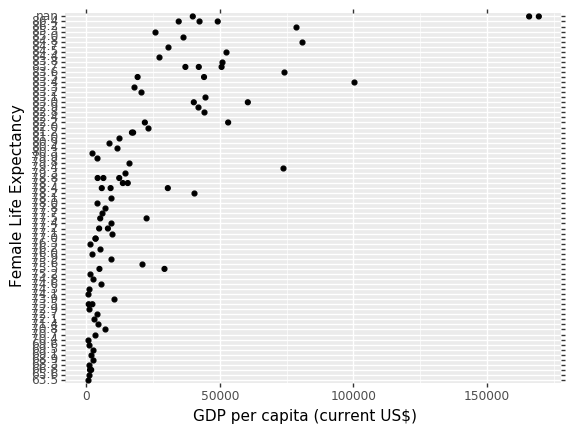

<ggplot: (81681029517)> 

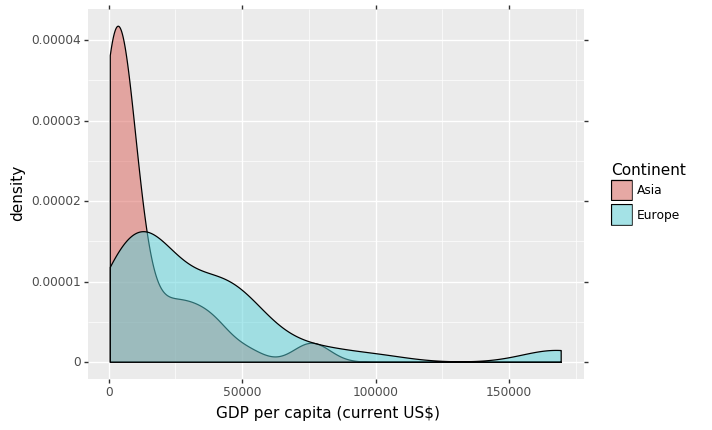

<ggplot: (81681029622)>


In [29]:
# Life expectancy density plot
plotLifeVCont = p9.ggplot(euasdata) + p9.aes(x='Female Life Expectancy', fill='Continent') +p9.geom_density(alpha=0.5)

# GDP vs life expectancy scatter plot
plotGDPVLife = p9.ggplot(euasdata) + p9.aes(x='GDP per capita (current US$)', y='Female Life Expectancy') +p9.geom_point()

# GDP density plot
plotGDPVCont = p9.ggplot(euasdata) + p9.aes(x='GDP per capita (current US$)', fill='Continent') + p9.geom_density(alpha=0.5)

# Print plots
print(plotGDPVLife, plotGDPVCont)


#GDP per Capita appears to be the confounding variable because it correlates with life expectancy 
#and differs between the continents

In [30]:
americans.shape

(4824, 15)

**Random sampling**

In this exercise, we're going to look at random sampling. You have been provided with a large dataset (athletes) containing the details of a large number of American athletes. For the purposes of this exercise, we are interested in differences between the body Weight of competitors in swimming and athletics. In order to test this, you'll be using a two-sample t-test. However, you will be performing this test on a random sample of the data. By playing with the random subset chosen, you'll see how randomness affects our results. You will need to extract a random subset of athletes from both events in order to run your test.

In [31]:
# Create subsets
seed = 0
subsetathl = athletics.sample(n=50, random_state= seed)
subsetswim = swimming.sample(n=50, random_state= seed)

In [32]:
subsetathl['Weight'].dropna(inplace = True)
subsetswim['Weight'].dropna(inplace = True)

In [33]:
#Performs two-sample t test on weight of athletes vs swimmers
t_result = stats.ttest_ind(subsetathl.Weight, subsetswim.Weight)
print(t_result) # No significant difference with this particular seed!

Ttest_indResult(statistic=-0.5136265346773201, pvalue=0.6089288342819512)


**Blocking**

We're going to have another look at the same data but, this time, we'll use blocking to improve our approach. Like last time, you'll be using a two-sample t-test on athlete Weight within your DataFrame, athletes. This time, however, you will control for Sex as a blocking factor, sampling equally from male and female participants. You will need to extract a random subset of athletes from both events to run your test. pandas, scipy.stats, plotnine, and random have been loaded into the workspace as pd, stats, p9, and ran, respectively.

In [34]:
seed = 9000

# Create subset blocks
subsetathlm = athletics[athletics.Sex == 'M'].sample(n=15, random_state= seed)
subsetathlf = athletics[athletics.Sex == 'F'].sample(n=15, random_state= seed)
subsetswimm = swimming[swimming.Sex == 'M'].sample(n=15, random_state= seed)
subsetswimf = swimming[swimming.Sex == 'F'].sample(n=15, random_state= seed)


# Combine blocks
subsetathl = pd.concat([subsetathlm, subsetathlf])
subsetswim = pd.concat([subsetswimm, subsetswimf])

#Drop nan
subsetathl['Weight'].dropna(inplace = True)
subsetswim['Weight'].dropna(inplace = True)

# Perform the two-sample t-test
print(stats.ttest_ind(subsetathl.Weight, subsetswim.Weight))

Ttest_indResult(statistic=-1.7819916586183633, pvalue=0.08094779480898769)


**One-Way ANOVA** (1 factor with 3+ levels)

Ex: Does potato production differ between 3 fertilizers?

Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries? In this exercise, you're going to use a one-way ANOVA to check for the presence of significant variation in Weight of Olympic athletes. You have been provided with the athletes DataFrame, containing details about male athletes from the Team of the United States, France, and China

A one-way ANOVA will allow you to see whether any differences between these groups of values are significant.

In [35]:
France_athletes_weight = athletics[athletics.Team == 'France'].Weight
France_athletes_weight.dropna(inplace = True)

US_athletes_weight = athletics[athletics.Team == 'United States'].Weight
US_athletes_weight.dropna(inplace = True)

China_athletes_weight = athletics[athletics.Team == 'China'].Weight
China_athletes_weight.dropna(inplace = True)

In [36]:
France_athletes_weight.describe()

count    1121.000000
mean       68.663693
std        13.430117
min        41.000000
25%        59.000000
50%        67.000000
75%        75.000000
max       150.000000
Name: Weight, dtype: float64

In [37]:
US_athletes_weight.describe()

count    2977.000000
mean       72.795096
std        16.606117
min        41.000000
25%        61.000000
50%        70.000000
75%        80.000000
max       158.000000
Name: Weight, dtype: float64

In [38]:
China_athletes_weight.describe()

count    420.000000
mean      68.130952
std       15.938710
min       42.000000
25%       55.000000
50%       65.000000
75%       77.000000
max      120.000000
Name: Weight, dtype: float64

In [39]:
# Perform one-way ANOVA
anova = stats.f_oneway(France_athletes_weight,US_athletes_weight,China_athletes_weight)
print(anova) #Significant differences exist

F_onewayResult(statistic=37.302750273231275, pvalue=8.550900718103951e-17)


**Twe-Way ANOVA** (2 factors with 2+ levels)

Ex: Does each factor explain variation in the dependent variable? 

We can have 2 fertilizers, 2 potato varieties, and see how potato production (DV) is affected

Let's have another look at some data from our Olympic dataset. How does the Weight of athletes vary between teams from different countries and of different sexes? In this exercise, you're going to use a two-way ANOVA to check for the presence of significant variation in the Weight of Olympic sprinters. You have been provided with the athletes DataFrame, containing details about athletes from the Team of the United States, and China, from both sexes.

A two-way ANOVA will allow you to see which of these two factors, Sex and Team, have a significant effect on Weight. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively.

In [40]:
# Extract athletes from either China or US

China_US = athletics[(athletics['Team'] == 'China') | (athletics['Team'] == 'United States')]

print(China_US.shape)

China_US.head()

(3659, 14)


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
51,274,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Amsterdam,Athletics,"Athletics Men's 5,000 metres",NaN
81,467,"Abdihakim ""Abdi"" Abdirahman",M,23.0,178.0,61.0,United States,USA,2000 Summer,2000,Sydney,Athletics,"Athletics Men's 10,000 metres",NaN
82,468,"Abdihakim ""Abdi"" Abdirahman",M,27.0,178.0,61.0,United States,USA,2004 Summer,2004,Athina,Athletics,"Athletics Men's 10,000 metres",NaN
83,469,"Abdihakim ""Abdi"" Abdirahman",M,31.0,178.0,61.0,United States,USA,2008 Summer,2008,Beijing,Athletics,"Athletics Men's 10,000 metres",NaN
84,470,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,London,Athletics,Athletics Men's Marathon,NaN


In [41]:
# Create model
formula = 'Weight ~ Sex + Team'
model = sm.api.formula.ols(formula, data = China_US).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table) #According to the result, Sex has a significant impact but Team does not

                 sum_sq      df           F         PR(>F)
Sex       130639.961475     1.0  556.693074  4.214237e-114
Team         130.523646     1.0    0.556197   4.558481e-01
Residual  796474.844541  3394.0         NaN            NaN


**Two-way ANOVA with interactive effects**

Once again, you're going to look at our dataset of Olympic athletes. As in previous exercises, you'll be looking at the variation in athlete Weight. You're going to look at athletes of either Sex competing in one of two Events: the 100 meter and 10,000 meter run

In [42]:
athletics.Event.unique()

array(["Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Athletics Men's Shot Put", "Athletics Men's Pole Vault",
       "Athletics Men's High Jump", "Athletics Men's 1,500 metres",
       "Athletics Men's 4 x 100 metres Relay",
       "Athletics Men's Long Jump", "Athletics Women's Javelin Throw",
       "Athletics Men's 5,000 metres", "Athletics Women's Shot Put",
       "Athletics Men's 110 metres Hurdles", "Athletics Women's Marathon",
       "Athletics Men's 100 metres", "Athletics Men's 400 metres Hurdles",
       "Athletics Men's 400 metres", "Athletics Men's Hammer Throw",
       "Athletics Men's 800 metres", "Athletics Men's Marathon",
       "Athletics Men's 4 x 400 metres Relay",
       "Athletics Men's 10,000 metres", "Athletics Women's 3,000 metres",
       "Athletics Men's 200 metres", "Athletics Men's Javelin Throw",
       "Athletics Men's 3,000 metres Steeplechase",
       "Athletics Women's 200 metres", "Athletics Men's Triple Ju

In [43]:
# Extract data of 100m and 10000m 
running_100 = olympics[(olympics['Event'] == 'Athletics Men\'s 100 metres') |  (olympics['Event'] == 'Athletics Women\'s 100 metres')]
print(running_100.Event.unique())
print(running_100.shape)
running_100['Event'] = '100m'   

running_10000 = olympics[(olympics['Event'] == 'Athletics Men\'s 10,000 metres') | (olympics['Event'] == 'Athletics Women\'s 10,000 metres')]
print(running_10000.Event.unique())
running_10000['Event'] = '10000m'
print(running_10000.shape)

running = pd.concat([running_100, running_10000])


print(running.shape)
running.head()

["Athletics Women's 100 metres" "Athletics Men's 100 metres"]
(2999, 14)
["Athletics Men's 10,000 metres" "Athletics Women's 10,000 metres"]
(1129, 14)
(4128, 14)


,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,100m,NaN
34,204,Carlos Rodolfo Abaunza Balladares,M,18.0,168.0,60.0,Nicaragua,NCA,2004 Summer,2004,Athina,Athletics,100m,NaN
38,216,Gana Abba Kimet,M,26.0,NaN,NaN,Chad,CHA,1972 Summer,1972,Munich,Athletics,100m,NaN
49,258,Ruslan Abbasov,M,22.0,181.0,74.0,Azerbaijan,AZE,2008 Summer,2008,Beijing,Athletics,100m,NaN
56,316,Younis Abdallah Rabee,M,23.0,169.0,68.0,Kuwait,KUW,1972 Summer,1972,Munich,Athletics,100m,NaN


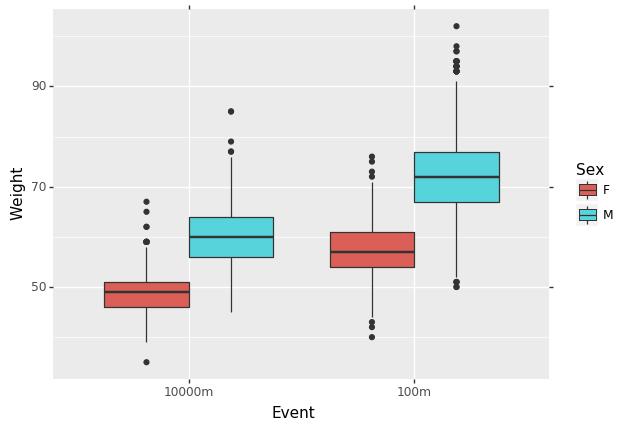

<ggplot: (81681238052)>

In [44]:
p9.ggplot(running)+ p9.aes('Event','Weight', fill = 'Sex')+ p9.geom_boxplot()

This dataset is provided in your workspace as athletes. An ANOVA will allow you to work out which of these variables affect Weight and whether an interactive effect is present. pandas, statsmodels, and plotnine have been loaded into the workspace as pd, sm, and p9, respectively

In [45]:
# Run the ANOVA
model = sm.api.formula.ols('Weight ~  Sex + Event + Sex:Event', data = running).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table) #Sex, Event and Sex:Event all have a significant effect on Weight. This means both factors influence weight
#and the effect of one factor is dependent on the other

                  sum_sq      df            F        PR(>F)
Sex        141607.485844     1.0  3191.693293  0.000000e+00
Event       83295.483535     1.0  1877.398179  0.000000e+00
Sex:Event    1551.609798     1.0    34.971757  3.680613e-09
Residual   148986.100430  3358.0          NaN           NaN


**Bonferroni correction** : Correct p-values for multiple non-independent tests and avoid 'p-value fishing'


Improved nutrition and healthcare has lead to increased human heights in most societies over the past century. But is this trend also reflected amongst elite athletes? To examine this, we'll be looking at another slice from our Olympic dataset and performing multiple tests.

You have been provided with the athletes dataset containing information about American male Olympic athletes from three years: 1924, 1952, and 2016. You will perform two-sample t-tests to compare the three timepoints, seen in boxplots. Between which times do significant differences exist? As you'll be performing multiple non-independent tests, you will need to perform Bonferroni correction on the results. statsmodels, scipy.stats, and pandas have been loaded for you as sm, stats, and pd.

In [46]:
americans_males = americans[americans['Sex'] == 'M']

americans_males.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,MedalTF
51,274,"David ""Dave"" Abbott",M,26.0,183.0,75.0,United States,USA,1928 Summer,1928,Amsterdam,Athletics,"Athletics Men's 5,000 metres",NaN,False
81,467,"Abdihakim ""Abdi"" Abdirahman",M,23.0,178.0,61.0,United States,USA,2000 Summer,2000,Sydney,Athletics,"Athletics Men's 10,000 metres",NaN,False
82,468,"Abdihakim ""Abdi"" Abdirahman",M,27.0,178.0,61.0,United States,USA,2004 Summer,2004,Athina,Athletics,"Athletics Men's 10,000 metres",NaN,False
83,469,"Abdihakim ""Abdi"" Abdirahman",M,31.0,178.0,61.0,United States,USA,2008 Summer,2008,Beijing,Athletics,"Athletics Men's 10,000 metres",NaN,False
84,470,"Abdihakim ""Abdi"" Abdirahman",M,35.0,178.0,61.0,United States,USA,2012 Summer,2012,London,Athletics,Athletics Men's Marathon,NaN,False


In [47]:
americans_males_1924 = americans_males[americans_males['Year'] == 1924]
print (americans_males_1924.shape)

americans_males_1952 = americans_males[americans_males['Year'] == 1952]
print (americans_males_1952.shape)

americans_males_2016 = americans_males[americans_males['Year'] == 2016]
print (americans_males_2016.shape)

(130, 15)
(95, 15)
(123, 15)


In [48]:
#Drop NA values
americans_males_1924.Height.dropna(inplace = True)
americans_males_1952.Height.dropna(inplace = True)
americans_males_2016.Height.dropna(inplace = True)

# Perform t-tests 
t_result_1924v2016= stats.ttest_ind(americans_males_1924.Height, americans_males_2016.Height)
t_result_1952v2016= stats.ttest_ind(americans_males_1952.Height, americans_males_2016.Height)
t_result_1924v1952= stats.ttest_ind(americans_males_1924.Height, americans_males_1952.Height)

# Create array of p-values
pvals_array = [t_result_1924v2016[1], t_result_1952v2016[1], t_result_1924v1952[1]]
print(pvals_array)

# Perform Bonferroni correction
adjustedvalues = sm.stats.multitest.multipletests(pvals_array, alpha=0.05, method='b')
print(adjustedvalues)

[2.0995273280295586e-16, 4.484419167217926e-05, 0.00013562429334889784]
(array([ True,  True,  True]), array([6.29858198e-16, 1.34532575e-04, 4.06872880e-04]), 0.016952427508441503, 0.016666666666666666)


**Šídák correction** 

We're looking at how the Height of Olympic athletes from the athletes dataset has changed over time. In this exercise, we're considering three events, the 100 meter, the High Jump, and the Marathon. You'll be examining the correlation between Height and Year separately for each Event. As you did before, you'll need to correct for multiple hypothesis tests, but, since these tests are independent, you can use the less-strict Šídák correction.

In [49]:
olympics.Event

0                         Athletics Women's 100 metres
1               Athletics Women's 4 x 100 metres Relay
2                  Swimming Men's 400 metres Freestyle
3               Swimming Men's 200 metres Breaststroke
4               Swimming Men's 400 metres Breaststroke
5               Swimming Men's 200 metres Breaststroke
6               Swimming Men's 400 metres Breaststroke
7               Swimming Men's 200 metres Breaststroke
8                             Athletics Men's Shot Put
9                           Athletics Men's Pole Vault
10                           Athletics Men's High Jump
11                        Athletics Men's 1,500 metres
12                 Swimming Men's 100 metres Butterfly
13                 Swimming Men's 200 metres Butterfly
14          Swimming Men's 4 x 100 metres Medley Relay
15                 Swimming Men's 100 metres Butterfly
16                 Swimming Men's 200 metres Butterfly
17                Athletics Men's 4 x 100 metres Relay
18        

In [50]:
men_marathon = olympics[(olympics['Event'] == 'Athletics Men\'s Marathon') &  (olympics['Team'] == 'United States')]
men_highjump = olympics[(olympics['Event'] == 'Athletics Men\'s High Jump') &  (olympics['Team'] == 'United States')]

#drop NA values
#men_100m.Height.dropna(inplace = True)
#men_marathon.Height.dropna(inplace = True)
#men_highjump.Height.dropna(inplace = True)

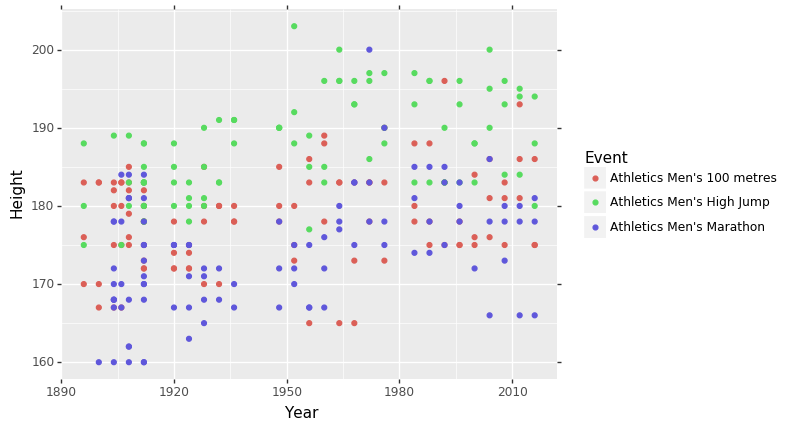

<ggplot: (81680144374)>


In [51]:
mara_high_100 = pd.concat([men_100m, men_marathon, men_highjump])

print(p9.ggplot(mara_high_100)+ p9.aes(x='Year', y='Height', color='Event')+  p9.geom_point())

In [52]:
# Perform Pearson correlations
pearson100 = stats.pearsonr(men_100m.Height, men_100m.Year)
pearsonHigh = stats.pearsonr(men_highjump.Height, men_highjump.Year)
pearsonMara = stats.pearsonr(men_marathon.Height, men_marathon.Year)

# Create array of p-values
pvals_array = [pearson100[1], pearsonHigh[1], pearsonMara[1]]
print(pvals_array)

# Perform Šídák correction
adjustedvalues=  sm.stats.multitest.multipletests(pvals_array, method= 's')
print(adjustedvalues)

[1.0, 1.0, 1.0]
(array([False, False, False]), array([1., 1., 1.]), 0.016952427508441503, 0.016666666666666666)


**Exploring sample size**

Now we'll explore the effect of sample size on the results of statistical tests. Here, we'll be comparing the Weight of American Athletics and Swimming competitors in the olympics dataset.

Conclusion is significance results are very different due to different sample sizes

In [53]:
# Create sample with defined random seed and perform t-test
athletics_subset = athletics.sample(n=1000, random_state= 507)
athletics_subset.Weight.dropna(inplace = True)

swimming_subset = swimming.sample(n=1000, random_state= 507)
swimming_subset.Weight.dropna(inplace = True)
print(stats.ttest_ind(athletics_subset.Weight, swimming_subset.Weight))

Ttest_indResult(statistic=-2.8864016020783976, pvalue=0.003946984990011393)


In [54]:
# Create sample with defined random seed and perform t-test
athletics_subset = athletics.sample(n=200, random_state= 507)
athletics_subset.Weight.dropna(inplace = True)

swimming_subset = swimming.sample(n=200, random_state= 507)
swimming_subset.Weight.dropna(inplace = True)
print(stats.ttest_ind(athletics_subset.Weight, swimming_subset.Weight))

Ttest_indResult(statistic=-1.0863236095771527, pvalue=0.2781287133728327)


In [55]:
# Create sample with defined random seed and perform t-test
athletics_subset = athletics.sample(n=50, random_state= 507)
athletics_subset.Weight.dropna(inplace = True)

swimming_subset = swimming.sample(n=50, random_state= 507)
swimming_subset.Weight.dropna(inplace = True)
print(stats.ttest_ind(athletics_subset.Weight, swimming_subset.Weight))

Ttest_indResult(statistic=-0.6204060794422013, pvalue=0.5367321474719067)


**Sample size for a t-test**


Now that we've seen the importance of sample size, let's have another look at the same athletes dataset and see if we can determine the sample size we would need to get a significant result.

Determine the sample size we would need to have an 80% chance of detecting a small (0.4) difference between these two samples.

In [56]:
# Set parameters
effect = 0.4
power = 0.8
alpha = 0.05

# Calculate ratio
swimmercount = float(len(swimming))
athletecount = float(len(athletics))
ratio = swimmercount/athletecount

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size = effect, power=power, alpha= alpha, nobs1=None, ratio=ratio)#Number of observations of sample one
print('Minimal Sample size to give significant results for given effect size, power and significance level: ', ssresult) 

Minimal Sample size to give significant results for given effect size, power and significance level:  131.9525742881456


**Effect size for a t-test** 

Significance: How sure we are that effect exists
Effect Size: How much difference that effect makes

Now, we're going to have a look at effect sizes. We are examining the same slice from the atheletes dataset, comparing the body weights of competitors from swimming and athletics events. 

You're going to calculate the effect sizes we are able to detect for a couple of different sampling strategies. First, you'll determine the smallest effect size detectable using the complete dataset. Then, in Step 2, you'll determine the size effect we could detect using 300 samples from each Sport

Conclusion is given all other parameters the same, the larger the sample size the smaller the effect size

In [57]:
# Set parameters
alpha = 0.05
power = 0.8
samp_size = athletecount

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size=None, power=power, alpha = alpha, ratio=ratio, nobs1 = samp_size)
print('Effect Size：', esresult) #Effect size

Effect Size： 0.023272712832054957


In [58]:
#Change parameters for a sample of 300 competitors from each group.
#Repeat effect size analysis and print result

# Set parameters
alpha = 0.05
power = 0.8
ratio = 1
samp_size = 300

# Initialize analysis & calculate sample size
analysis = pwr.TTestIndPower()
esresult = analysis.solve_power(effect_size=None, power=power, nobs1=samp_size, ratio=ratio, alpha=alpha)
print('Effect Size：', esresult) 

Effect Size： 0.22911649250766367


**Computing Cohen's d**

Cohen's d: It is an effect size is used to indicate the standardised difference between 2 means
Now, using the same comparison of Weight difference between Sports, let's calculate the actual effect size for this comparison. 

In [59]:
# Create series
athl = athletics.Weight.dropna()
swim = swimming.Weight.dropna()

# Calculate difference between means and pooled standard deviation
diff = swim.mean() - athl.mean()
pooledstdev = np.sqrt((athl.std()**2 + swim.std()**2)/2 )

# Calculate Cohen's d
cohend = diff / pooledstdev
print('Cohen\'s d: ', cohend) #Since Cohen's d > effect size(0.023), we can expect the parameters 
#from the last exercise to detect a difference like this

Cohen's d:  0.09908167340439906


**Effect sizes for Pearson correlation**

Now we're going to look at effect sizes for Pearson correlations. In a previous exercise, we used Pearson correlation to examine the link between Weight and Height for athletes from our Olympic dataset. Now, we're going to focus a single event, the 10,000 meter run, and compare the results we obtain for Pearson tests of correlation for competitors from two Teams, Kenya (ken DataFrame) and Ethiopia (eth DataFrame). Which has a higher effect strength? 

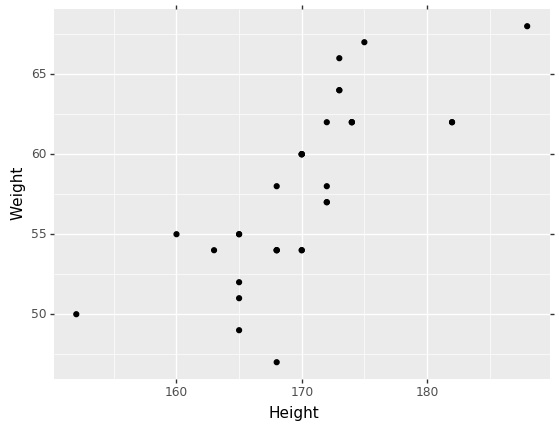

<ggplot: (-9223371955173645424)>


In [60]:
ken = olympics[(olympics['Team'] == 'Kenya') & (olympics['Event'] == 'Athletics Men\'s 10,000 metres')]

print(p9.ggplot(ken)+ p9.aes(x='Height', y='Weight')+  p9.geom_point())

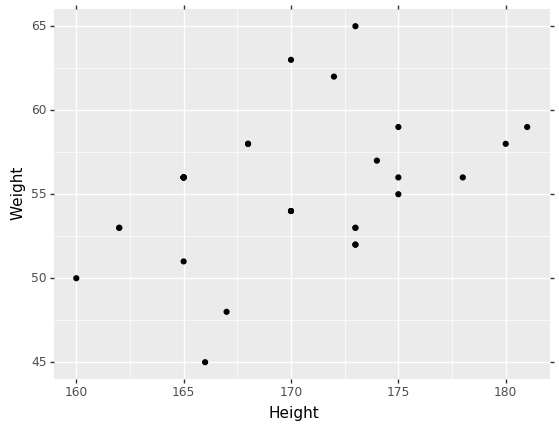

<ggplot: (-9223371955174514151)>


In [61]:
eth = olympics[(olympics['Team'] == 'Ethiopia') & (olympics['Event'] == 'Athletics Men\'s 10,000 metres')]

print(p9.ggplot(eth)+ p9.aes(x='Height', y='Weight')+  p9.geom_point())

In [62]:
ken.Height.dropna(inplace = True)
ken.Weight.dropna(inplace = True)

In [63]:
# Perform Pearson correlation
pearsonken = stats.pearsonr(ken.Weight, ken.Height)
print('Kenya has higher correlation and lower noise: ', pearsonken)

pearsoneth = stats.pearsonr(eth.Weight, eth.Height)
print('Ethiopia has lower correlation and higher noise: ', pearsoneth)

Kenya has higher correlation and lower noise:  (0.7453064505495948, 6.497110521502846e-07)
Ethiopia has lower correlation and higher noise:  (0.3728450639500469, 0.03885112030532914)


**Power analysis for a t-test**

Power is the probability that a test will return significant when the alternative hypothesis holds true. We can think of it as 
the ability to draw a firm conclusion from e.g a calculated p-value from t-test

Now we're going to have another look at the same example, drawn from our Olympic dataset (Weight difference between Sports). 

In [64]:
# Set parameters
effect_size = 0.42145
alpha = 0.05
samp_size = 100
ratio = 1

# Initialize analysis & calculate power
analysis = pwr.TTestIndPower()
pwresult = analysis.solve_power(effect_size=effect_size, power=None, alpha=alpha, ratio=ratio, nobs1=samp_size)
print('Power is: ', pwresult)

Power is:  0.8427090697725371


**Exploring distributions with summary stats** 

Let's return to our UN demographic data, countrydata, to examine distributions using summary statistics. For each Country, you have information about the GDP per capita in USD (GDP_per_cap) and the unemployment rate (Unemployment). How close to normality is each?

In [65]:
#import global UN dataset
UN = pd.read_csv('UN.csv')

print(UN.shape)

UN.head()

(229, 50)


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,8.3,42.0,2.1,9.8/0.3,63.0,5.0,78.2/47.0,45.1/27.0,21.43,NaN
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,63.3,130.0,28.2,5.7/2.0,84.0,36.0,94.9/95.2,95.5/90.2,2.96,NaN
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,38.2,135.0,0.8,145.4/3.7,5900.0,55.0,84.3/81.8,89.8/82.2,0.05,NaN
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,...,NaN,92.0,87.9,NaN,NaN,NaN,100.0/100.0,62.5/62.5,NaN,NaN
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,96.9,13.0,34,0.5/6.4,1.0,119.0,100.0/100.0,100.0/100.0,NaN,NaN


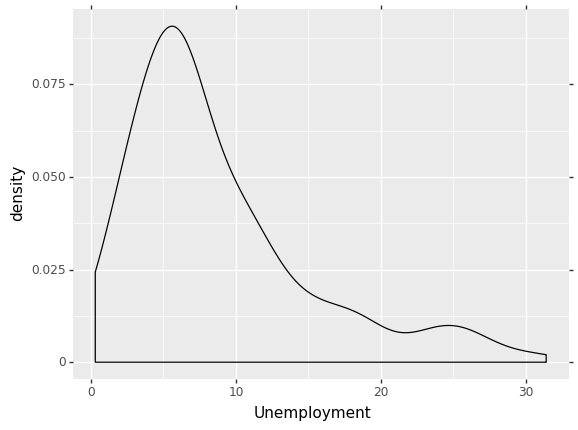

<ggplot: (81680146510)>
8.799504950495049
6.75
0    5.6
1    6.6
2    6.8
dtype: float64


In [66]:
# Print density plot, mean, median, and mode of Unemployment
UN.rename(columns={"Unemployment (% of labour force)": "Unemployment"}, inplace = True)
UN['Unemployment'] = pd.to_numeric(UN[UN['Unemployment'] != '...']['Unemployment'])
UN.Unemployment.dropna(inplace = True)

print(p9.ggplot(UN)+ p9.aes(x= 'Unemployment')+ p9.geom_density())
print(UN.Unemployment.mean())
print(UN.Unemployment.median())
print(UN.Unemployment.mode())

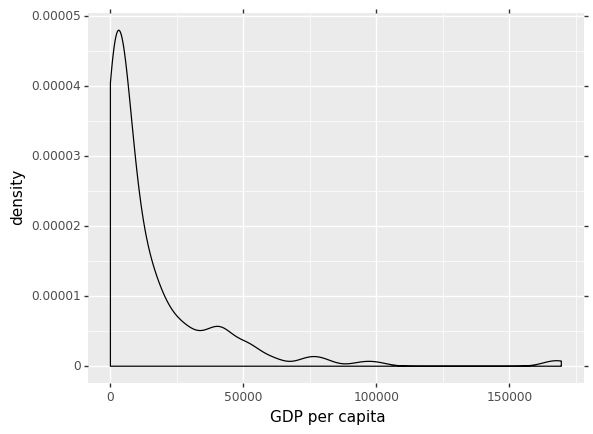

<ggplot: (81680146601)>
15700.764423076924
5935.450000000001
0    1106.4
dtype: float64


In [67]:
# Print density plot, mean, median, and mode of GDP_per_capita

UN.rename(columns={"GDP per capita (current US$)": "GDP per capita"}, inplace = True)
UN['GDP per capita'] = pd.to_numeric(UN[UN['GDP per capita'] != '...']['GDP per capita'])
UN['GDP per capita'].dropna(inplace = True)

print(p9.ggplot(UN)+ p9.aes(x= 'GDP per capita')+ p9.geom_density())
print(UN['GDP per capita'].mean())
print(UN['GDP per capita'].median())
print(UN['GDP per capita'].mode())

**Q-Q plot**

When the distribution is normally distributed, a straight QQ plot will be displayed

Another way to examine the normality of a distribution is with a Q-Q (quantile-quantile) plot. For this exercise, you will create a Q-Q plot for the country-level Unemployment data you saw in the last exercise (available in your workspace as countrydata). The Q-Q plot compares the theoretical quantiles expected under a normal distribution to the actual observed values (ordered). When a distribution is normally distributed, you will see a straight line. The more crooked the line is, the farther the distribution departs from normality. pandas and scipy.stats have been loaded into the workspace as pd and stats.

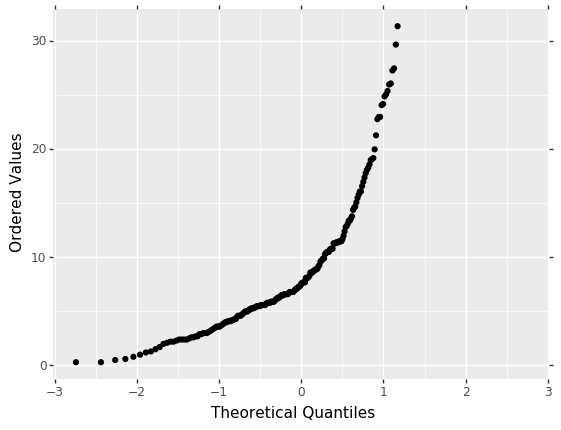

<ggplot: (-9223371955173746407)>


In [68]:
# Calculate theoretical quantiles
tq = stats.probplot(UN.Unemployment, dist='norm')

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": UN.Unemployment.sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Ordered Values") +p9.geom_point())

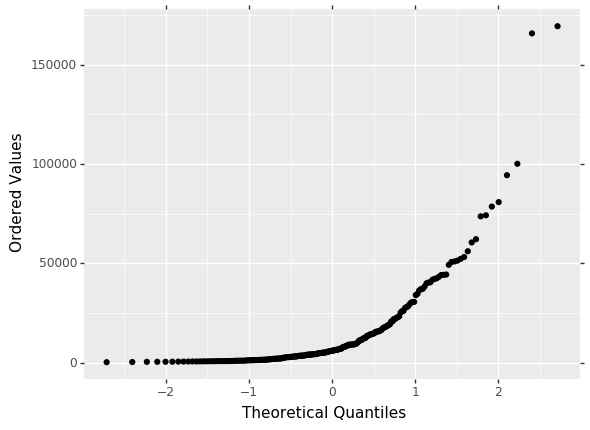

<ggplot: (81680153313)>


In [69]:
# Calculate theoretical quantiles
tq = stats.probplot(UN['GDP per capita'], dist='norm')

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": UN['GDP per capita'].sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles', "Ordered Values") +p9.geom_point())

**Shapiro-Wilk test** 

Previously, you looked at country-level Unemployment and GDP per capita (GDP_per_cap) data (available in your workspace as countrydata). Now, you will use a Shapiro-Wilk test to examine whether the distribution of values seen in these samples, as seen in the Q-Q plots above, departs significantly from the normal distribution. This test tells us how closely a given sample fits the patterns expected from a normal distribution.

In [70]:
# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = stats.shapiro(UN.Unemployment)
print(shapiroUnem) #p-values rejects the hypothesis that sample looks like Gaussian

(nan, 1.0)


In [71]:
# Perform Shapiro-Wilk test on Unemployment and print result
shapiroGDP = stats.shapiro(UN['GDP per capita'])
print(shapiroGDP)

(0.6302613615989685, 5.600625458404526e-21)


Summary: Both distributions are non-normal. Compare the test statistic at index[0] for the two tests. The GDP per capita value is lower, which makes sense if you think about how much more skewed those figures were.

**Wilcoxon rank-sum test**

In a previous exercise, you compared the sex ratio of European countries (Europe_Sex_ratio) with the sex ratio of Asian countries (Asia_Sex_ratio). 

You used a t-test to compare these two samples and found a significant difference (t_result). However, given that these samples are not normally distributed, a Wilcoxon rank-sum test would be more appropriate. Does the sex ratio differ between continents?

In [72]:
t_result= stats.ttest_ind(europe['Sex ratio'], asia['Sex ratio'])
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("Europe and Asia have different mean sex ratios")
    
else: print("No significant difference found")

Ttest_indResult(statistic=-2.1196552594510925, pvalue=0.03661463597787138)
Europe and Asia have different mean sex ratios


In [73]:
wilc = stats.ranksums(europe['Sex ratio'], asia['Sex ratio'])
print(wilc)#  Note that wilc is actually lower (more significant) than those for the t-test. 
#This is because the rank-sum test is less sensitive to outliers.

RanksumsResult(statistic=-3.6244121780453775, pvalue=0.0002896194097555518)


Summary: A Wilcoxon rank-sum test is better than a t-test if our sample is not sufficiently large and is non-normal

**Parametric vs non-parametric tests**

Once again we'll be using the Olympic dataset. Here we're going to compare the Height of athletes from both the Norwegian and Chinese 1996 Teams. 

In [74]:
china_1996 = olympics[(olympics['Team'] == 'China') & (olympics['Year'] == 1996)]

china_1996.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
8121,33513,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 100 metres Butterfly,NaN
8122,33514,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
9239,38523,Chao Na,F,16.0,178.0,69.0,China,CHN,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver
9413,39303,Chen Jing,M,20.0,183.0,75.0,China,CHN,1996 Summer,1996,Atlanta,Athletics,Athletics Men's Long Jump,NaN
9439,39425,Chen Wenzhong,M,25.0,175.0,70.0,China,CHN,1996 Summer,1996,Atlanta,Athletics,Athletics Men's 100 metres,NaN


In [75]:
norway_1996 = olympics[(olympics['Team'] == 'Norway') & (olympics['Year'] == 1996)]

norway_1996.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
2900,11016,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 100 metres Breaststroke,NaN
2901,11017,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 200 metres Breaststroke,NaN
2902,11018,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 200 metres Individual Medley,NaN
4937,19993,Mette Bergmann,F,33.0,174.0,80.0,Norway,NOR,1996 Summer,1996,Atlanta,Athletics,Athletics Women's Discus Throw,NaN
11765,48406,Irene Karine Dalby,F,25.0,181.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,Swimming Women's 400 metres Freestyle,NaN


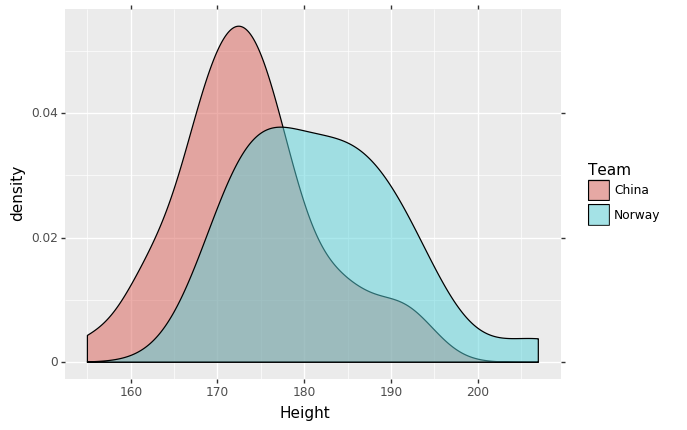

<ggplot: (81680146552)>

In [76]:
china_norway_1996 = pd.concat([china_1996, norway_1996])

p9.ggplot(china_norway_1996) + p9.aes(x='Height', fill='Team') + p9.geom_density(alpha=0.5)

Do these two distributions look normal or not? First, we'll test whether these sets of samples follow a normal distribution, via a couple of Shapiro-Wilks tests. Then we'll choose what statistical test to use. Finally, we'll test the difference between the Norwegian and Chinese samples.

In [77]:
# Separate the heights by country
NorwayHeights = norway_1996.Height
ChinaHeights = china_1996.Height

# Shapiro-wilks test on the heights
print(stats.shapiro(NorwayHeights)[1]) #Supports Norway's Height is normal
print(stats.shapiro(ChinaHeights)[1]) ##Rejects China's Height is normal

0.12311235070228577
0.026477865874767303


In [78]:
# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(NorwayHeights, ChinaHeights)
print(wilc) # With a p-value less than 0.05, this difference is statistically significant. 
#This approach is better than the t-test due to the non-normality in Team China's height

RanksumsResult(statistic=3.8752175150628543, pvalue=0.00010652949777206396)


**Spearman correlation**

We're going to return to our Olympic dataset, where, as in previous exercises, we'll be looking at the correlation between Height and Weight amongst athletics competitors since 2000. 

In [79]:
athletesM = athletics[(athletics['Sex'] == 'M') & (athletics['Year'] >= 2000) & (athletics['Height'] is not None) & (athletics['Weight'] is not None)]

athletesM.shape

(6268, 14)

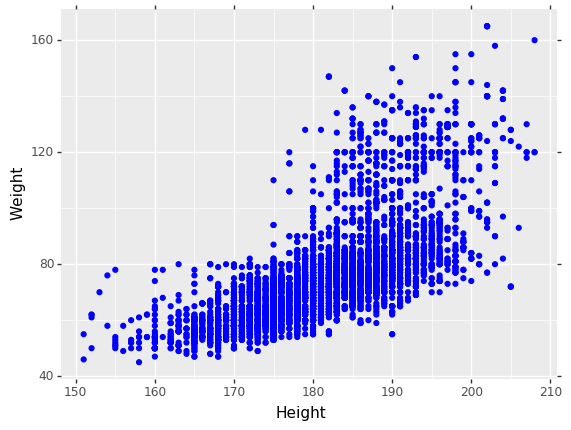

<ggplot: (-9223371955173591594)>


In [80]:
print(p9.ggplot(athletesM)+ p9.aes(x='Height', y='Weight')+  p9.geom_point(color = 'blue'))

In [81]:
athletesF = athletics[(athletics['Sex'] == 'F') & (athletics['Year'] >= 2000) & (athletics['Height'] is not None) & (athletics['Weight'] is not None)]

athletesF.shape

(5405, 14)

In [82]:
athletesF.Height.unique()

array([168., 179., 155., 147., 163., 180., 170., 159., 173., 164., 182.,
       157., 150., 167., 188., 193., 166., 162.,  nan, 153., 165., 177.,
       175., 160., 178., 158., 171., 148., 172., 149., 156., 152., 169.,
       186., 176., 191., 161., 174., 183., 142., 190., 146., 181., 184.,
       151., 189., 154., 145., 185., 192., 187.])

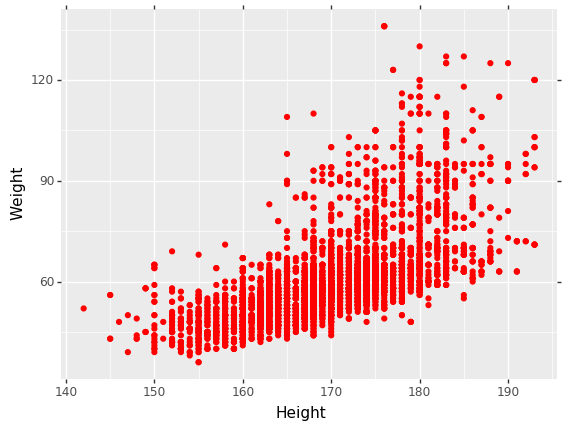

<ggplot: (-9223371955173197287)>


In [83]:
print(p9.ggplot(athletesF)+ p9.aes(x='Height', y='Weight')+  p9.geom_point(color = 'red'))

In [84]:
athletesF.Height.dropna(inplace = True)
athletesF.Weight.dropna(inplace = True)
print (len(athletesF.Height))
print (len(athletesF.Weight))

athletesM.Height.dropna(inplace = True)
athletesM.Weight.dropna(inplace = True)

5307
5308


In [85]:
idx1 = athletesF.Height.index
idx2 = athletesF.Weight.index

idx1.difference(idx2)



Int64Index([903, 12970, 23698, 26206, 29963, 30292, 34487, 37627, 41842,
            59176],
           dtype='int64')

In [86]:
idx2.difference(idx1)

Int64Index([1017, 1761, 3906, 9507, 9544, 33916, 33917, 39918, 45208, 58540,
            60426],
           dtype='int64')

In [87]:
athletesF.Weight.drop(index = 1017, inplace = True)

In [88]:
# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesF.Height, athletesF.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesF.Height, athletesF.Weight)
print(spearcorr)# Non-parametric Spearman correlation works well for non-linear relationships.

(0.29151700751521864, 1.844765415379327e-104)
SpearmanrResult(correlation=0.3253202884295878, pvalue=4.61466518300999e-131)


In [89]:
# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesM.Height, athletesM.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesM.Height, athletesM.Weight)
print(spearcorr)# Non-parametric Spearman correlation works well for non-linear relationships.

(0.3642789949526982, 3.1862955478495748e-192)
SpearmanrResult(correlation=0.40400993418106573, pvalue=4.533256315364384e-240)
